In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyccl as ccl
import os
import getdist
from getdist import plots, MCSamples
%matplotlib inline

In [9]:
names_planck  = ['ns', 'h', 'Ωm', 'Ωb', 's8']
labels_planck = [r'n_s', r'h', r'\Omega_{\rm{m}}', 
                 r'\Omega_{\rm{b}}', r'\sigma_{\rm{8}}']

planck1 = np.loadtxt('/home/jaime/Master/PLANCK/Planck_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE_post_zre6p5_1.txt')
planck2 = np.loadtxt('/home/jaime/Master/PLANCK/Planck_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE_post_zre6p5_2.txt')
planck3 = np.loadtxt('/home/jaime/Master/PLANCK/Planck_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE_post_zre6p5_3.txt')
planck4 = np.loadtxt('/home/jaime/Master/PLANCK/Planck_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE_post_zre6p5_4.txt')

planck_tot = np.concatenate((planck1, planck2, planck3, planck4), axis=0)

planck_params = []
for item in planck_tot:
    planck_params.append([item[7], item[29]/100, item[31], item[2]/(item[29]/100)**2, item[34]])
planck_params = np.array(planck_params)
planck_samples = MCSamples(samples=planck_params, names = names_planck, labels = labels_planck, label= r'$Planck$ 2018',
                    weights=np.transpose(planck_tot)[0],loglikes=np.transpose(planck_tot)[1])

Removed no burn in


In [10]:
names_DES  = ['ns', 'h', 'Ωm', 'Ωb', 's8', 'b0', 'b1', 'b2', 'b3', 'b4']
labels_DES = [r'n_s', r'h', r'\Omega_{\rm{m}}', 
                 r'\Omega_{\rm{b}}', r'\sigma_{\rm{8}}',
               'b_0', 'b_1', 'b_2', 'b_3', 'b_4' ]

DES_ref__1 = np.loadtxt('/home/jaime/PhD/LimberJack.jl/chains/desgc_deswl_dz_s8zpaper/desgc_deswl_dz_s8zpaper.1.txt')
DES_ref__2 = np.loadtxt('/home/jaime/PhD/LimberJack.jl/chains/desgc_deswl_dz_s8zpaper/desgc_deswl_dz_s8zpaper.2.txt')
DES_ref__3 = np.loadtxt('/home/jaime/PhD/LimberJack.jl/chains/desgc_deswl_dz_s8zpaper/desgc_deswl_dz_s8zpaper.3.txt')
DES_ref__4 = np.loadtxt('/home/jaime/PhD/LimberJack.jl/chains/desgc_deswl_dz_s8zpaper/desgc_deswl_dz_s8zpaper.4.txt')
DES_ref__5 = np.loadtxt('/home/jaime/PhD/LimberJack.jl/chains/desgc_deswl_dz_s8zpaper/desgc_deswl_dz_s8zpaper.5.txt')
DES_ref__6 = np.loadtxt('/home/jaime/PhD/LimberJack.jl/chains/desgc_deswl_dz_s8zpaper/desgc_deswl_dz_s8zpaper.6.txt')

DES_ref_tot = np.concatenate((DES_ref__1, DES_ref__2, DES_ref__3,
                               DES_ref__4, DES_ref__5, DES_ref__6),
                               axis=0)

In [11]:
DES_ref_params = []
for item in DES_ref_tot:
    DES_ref_params.append([item[6], item[5], item[3]+item[4], item[4], item[27],
                           item[7], item[8], item[9], item[10], item[11]])
DES_ref_params = np.array(DES_ref_params)
DES_ref_samples = MCSamples(samples=DES_ref_params, names = names_DES, labels = labels_DES, label= r'$DESY1$ ref.',
                    weights=np.transpose(DES_ref_tot)[0],loglikes=np.transpose(DES_ref_tot)[1])

Removed no burn in


In [12]:
path = '/home/jaime/PhD/LimberJack.jl/chains/'
DES_Wms8__1 = pd.read_csv(path+'DES_NUTS_TAP0.6/chain_2022-04-26T12%3A24%3A03.248.csv')
DES_Wms8__2 = pd.read_csv(path+'DES_different_bias_NUTS_TAP0.6/chain_2022-05-01T17%3A36%3A59.766.csv')
DES_Wm_s8_bias = pd.read_csv(path+'DES_full2_NUTS_TAP0.6/chain_2022-04-28T10%3A39%3A42.237.csv')
DES_cosmo = pd.read_csv(path+'DES_full3_NUTS_TAP0.6/chain_2022-04-28T14%3A42%3A24.798.csv')
DES_cosmo_bias = pd.read_csv(path+'DES_full_NUTS_TAP0.6/chain_2022-05-04T14%3A20%3A16.983.csv')

In [14]:
labels_dict = {'b0': 'b_0',
               'b1': 'b_1',
               'b2': 'b_2',
               'b3': 'b_3',
               'b4': 'b_4',
               'ns': 'n_s',
               'h': 'h',
               'Ωm': '\Omega_m',
               'Ωb': '\Omega_b',
               's8': '\sigma_8',
               'S8': 'S_8'}
names_All = ['b1', 'b2', 'b3', 'b4', 'b5', 'ns', 'h', 'Omega_m', 'Omega_b', 's80', 'S80']
ranges = None #{'h': (0.6, 0.8), 'Ωm':(0.1, 0.5),  's8': (0.7, 1.0)}

In [15]:
def make_samples(file, names, rangess, label):
    namess = []
    labels = []
    samples = []
    for name in names:
        if name in np.array(file.keys()):
            namess.append(name) 
            labels.append(labels_dict[name]) 
            samples.append(np.array(file[name]))
    return MCSamples(samples=samples, names=namess, labels=labels, label=label, ranges=rangess)
                    #settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.2, 'smooth_scale_1D':0.2})

In [16]:
DES_Wms8__1_samples = make_samples(DES_Wms8__1, ['Ωm', 's8'], 
                                   ranges, 'DES_Wms8__1')
DES_Wms8__2_samples = make_samples(DES_Wms8__2, ['Ωm', 's8'], 
                                   ranges, 'DES_Wms8__2')
DES_bias_samples = make_samples(DES_Wm_s8_bias, ['b0', 'b1', 'b2', 'b3', 'b4', 'Ωm', 's8'], 
                                   ranges, 'DES_Wm_s8_bias')
DES_cosmo_samples = make_samples(DES_cosmo, ['ns', 'h', 'Ωm', 'Ωb', 's8'], 
                                   ranges, 'DES_cosmo')
DES_cosmo_bias_samples = make_samples(DES_cosmo_bias, ['b0', 'b1', 'b2', 'b3', 'b4', 'ns', 'h', 'Ωm', 'Ωb', 's8'], 
                                   ranges, 'DES_cosmo')

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


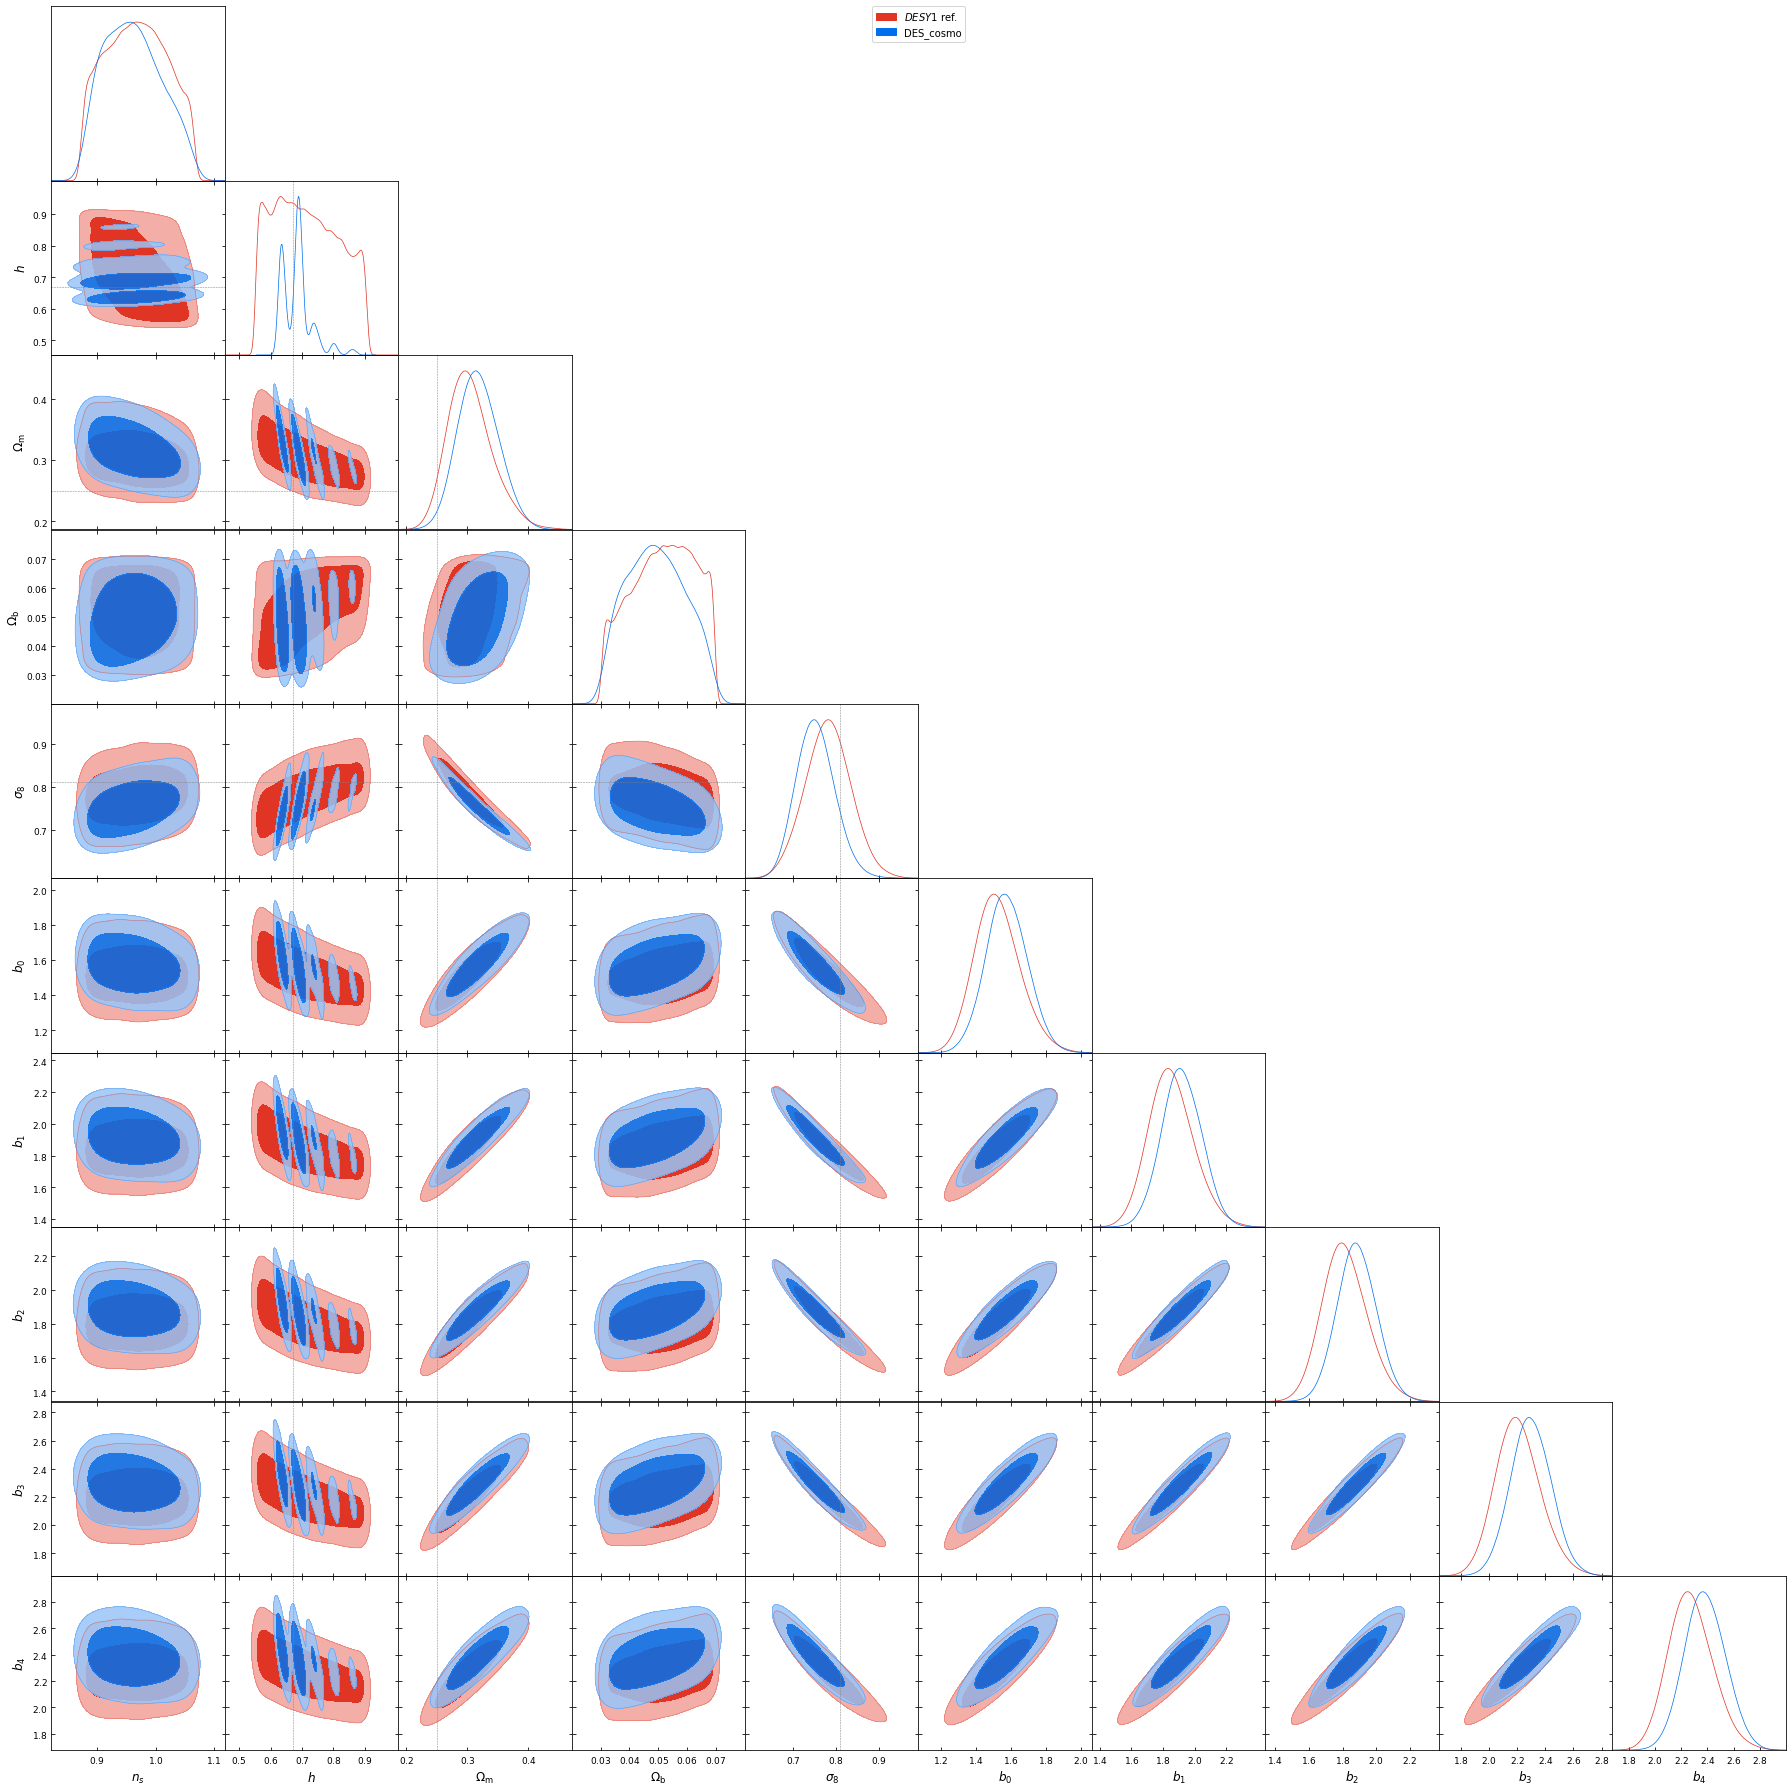

In [19]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot([DES_ref_samples, DES_cosmo_bias_samples], filled=True,
                markers={'h': 0.67,
                         'Ωm': 0.25,
                         's8': 0.81})

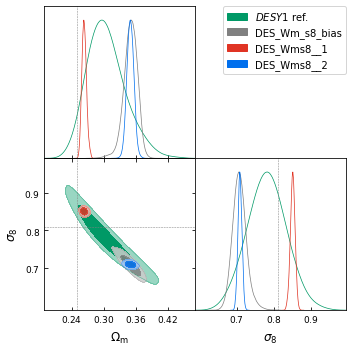

In [17]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot([DES_ref_samples, DES_bias_samples, DES_Wms8__1_samples, DES_Wms8__2_samples], ['Ωm', 's8'], filled=True,
                markers={'h': 0.67,
                         'Ωm': 0.25,
                         's8': 0.81})

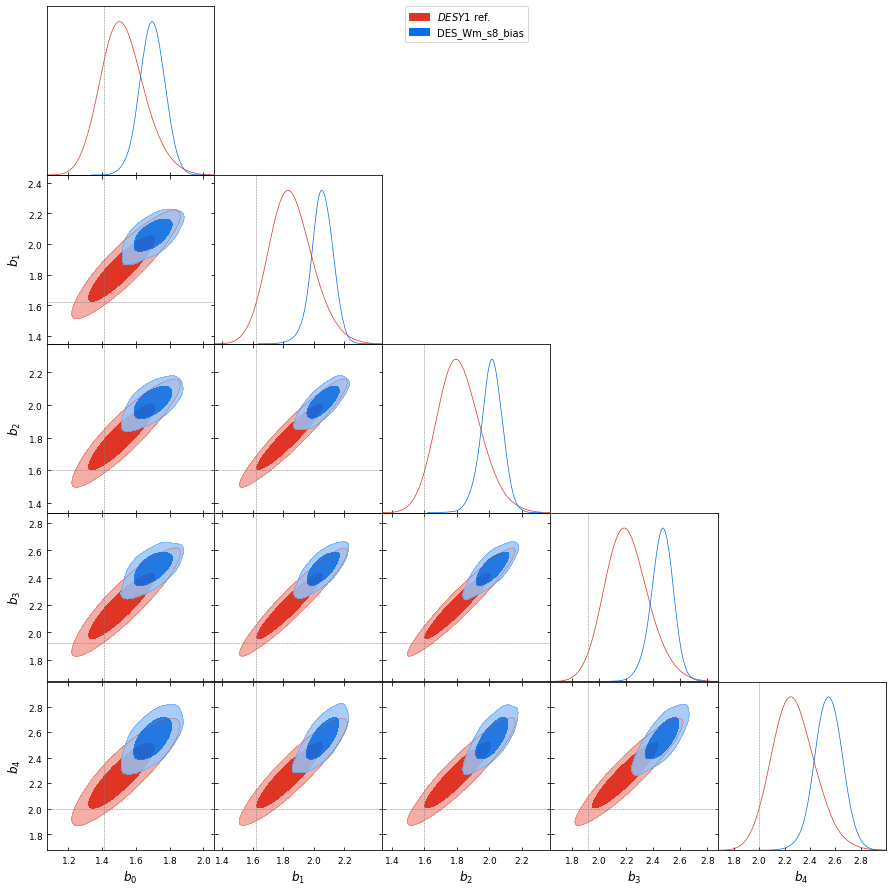

In [18]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot([DES_ref_samples, DES_bias_samples],
                ['b0', 'b1', 'b2', 'b3', 'b4'], filled=True, 
               markers={'ns': 0.96,
                        'h': 0.67,
                        'Ωm': 0.25,
                        'Ωb': 0.05,
                        's8': 0.81, 
                        'b0': 1.41,
                        'b1': 1.62,
                        'b2': 1.60,
                        'b3': 1.92,
                        'b4': 2.00})

In [28]:
b0 = 1.69 #1.41 #~ Uniform(1.0, 3.0)
b1 = 2.05 #1.62 #~ Uniform(1.0, 3.0)
b2 = 2.01 #1.60 #~ Uniform(1.0, 3.0)
b3 = 2.46 #1.92 #~ Uniform(1.0, 3.0)
b4 = 2.54 #2.00 #~ Uniform(1.0, 3.0)